# 💊 **Talent Flow - Rotacion Laboral**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Creado para el conteo de empleados
df_p = pd.read_csv("PFDA_People_analytics.csv", sep=';')

# 🧑Conteo de empleados

In [5]:
df_p['Attrition'].head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [6]:
# 1. Total de empleados
# El número total de empleados es el número total de filas
total_employees = df_p.shape[0]
print(f"Total de empleados en el dataset: {total_employees}")

Total de empleados en el dataset: 1470


In [7]:
# 2. Contar cuántos han abandonado y cuántos siguen
# Usamos value_counts() en la columna 'Attrition'
attrition_counts = df_p['Attrition'].value_counts()
print("\n¿Salieron de la empresa?")
print("No: Cantidad de empleados que se mantienen")
print("Yes: Cantidad de empleados que salieron")
print(attrition_counts)


¿Salieron de la empresa?
No: Cantidad de empleados que se mantienen
Yes: Cantidad de empleados que salieron
Attrition
No     1233
Yes     237
Name: count, dtype: int64


### 👪 Empleados totales: Hay un total de 1470 empleados en el conjunto de datos.

### ❎ Empleados que siguen en la empresa (Attrition = 'No'): 1233

### ✅ Empleados que han abandonado la empresa (Attrition = 'Yes'): 237

# 🔎 Calculo de la tasa de rotacion del personal de la empresa

---







In [8]:
# Contar los valores 'Yes' y 'No'
abandonaron = attrition_counts.get('Yes', 0)
total_empleados = len(df_p)

# Calcular el porcentaje
tasa_rotacion = (abandonaron / total_empleados) * 100

print(f"Total de empleados: {total_empleados}")
print(f"Empleados que abandonaron (Yes): {abandonaron}")
print(f"Tasa de Rotación de Personal: {tasa_rotacion:.2f}%")

Total de empleados: 1470
Empleados que abandonaron (Yes): 237
Tasa de Rotación de Personal: 16.12%


([<matplotlib.patches.Wedge at 0x1d6902963c0>,
 [Text(0.3938392555478236, -1.0270786925983502, 'Siguen (No)'),
  Text(-0.39383959021251985, 1.0270785642691773, 'Abandonaron (Yes)')],
 [Text(0.21482141211699468, -0.5602247414172818, '83.9%'),
  Text(-0.21482159466137443, 0.5602246714195512, '16.1%')])

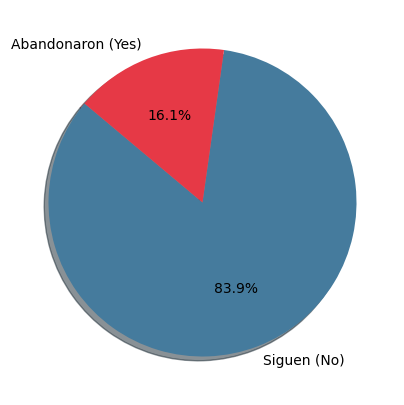

In [9]:
# Hacemos un gráfico de torta para mostrar el porcentaje
plt.figure(figsize=(5, 5))

# Datos para el gráfico de torta
labels = ['Siguen (No)', 'Abandonaron (Yes)']
sizes = [attrition_counts.get('No', 0), abandonaron]
colors = ['#457B9D', '#E63946']

# Hacemos el gráfico
plt.pie(sizes, labels=labels, colors=colors,
  autopct='%1.1f%%', # Mostrar porcentaje
  shadow=True, startangle=140)

### Del total de empleados registrados, el 16.1 % ha abandonado la empresa, mientras que el 83.9 % permanece activo. Este nivel de rotación indica un riesgo moderado de pérdida de talento, lo cual sugiere revisar las causas asociadas (por ejemplo, satisfacción laboral, oportunidades de promoción o carga de trabajo).

 ---

# Nueva Variable: RecentlyPromoted

“Sí (≤2 años sin promoción)”

“No (>2 años sin promoción)”

Esto permite analizar promoción como variable categórica de riesgo.

Text(0.5, 1.0, 'Years Since Last Promotion vs Attrition')

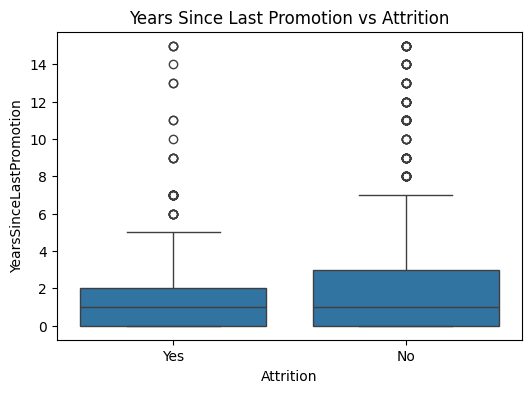

In [10]:
# Plot 1: Promotion recency vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.title("Years Since Last Promotion vs Attrition")

¿Cómo afecta la promoción a la rotación?

Los empleados que renuncian llevan menos tiempo sin ser promovidos

En el boxplot se observa:

El grupo “Yes” (renunció) tiene mediana cercana a 1 año sin promoción.

El grupo “No” (permanece) muestra valores similares, pero con mayor dispersión.

🔍La renuncia no ocurre solo en empleados que llevan 5–10 años sin ascenso.
Incluso 1–2 años sin promoción puede generar desgaste si no ven oportunidades claras.

In [14]:
# Crear variable RecentlyPromoted (Recencia de promoción)
df_p["RecentlyPromoted"] = df_p["YearsSinceLastPromotion"].apply(
    lambda x: "Sí (<=2 años)" if x <= 2 else "No (>2 años)"
)

Text(0.5, 1.0, 'Attrition por Recencia de Promoción')

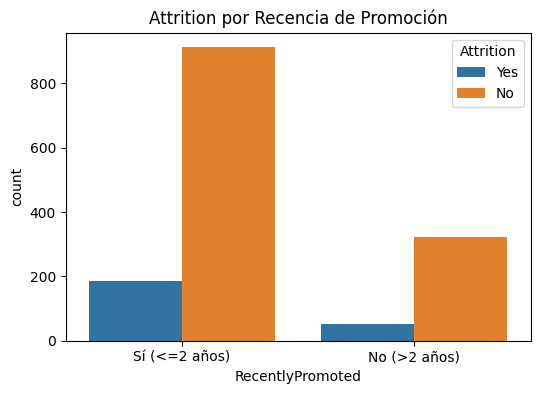

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_p, x="RecentlyPromoted", hue="Attrition")
plt.title("Attrition por Recencia de Promoción")

En el countplot:

La mayoría de los empleados están dentro del grupo "Sí (≤2 años)", porque la empresa suele promover con frecuencia estable.
Pero dentro del grupo "No (>2 años)", el porcentaje de renuncias es más alto proporcionalmente.

🔍Los empleados que pasan más de 2 años sin promoción presentan un riesgo mayor de rotación.

Es una señal clásica de:

* estancamiento profesional

* percepción de injusticia

* falta de oportunidades y crecimiento laboral

# Afectó – Afecta – Afectará la rotación laboral (análisis temporal)
## Afectó (pasado)

Los empleados que renunciaron:

Tenían periodos relativamente cortos sin promoción (1–2 años).

Esto sugiere que históricamente la empresa quizá no tenía un proceso claro de crecimiento, o que los ascensos no cumplían expectativas.

👉 Posible problema histórico:
Expectativas elevadas vs. ascensos insuficientes → frustración temprana.

## Afecta (actualidad)

El análisis revela dos grupos vulnerables hoy:

1. Empleados con >2 años sin promoción

    Están mostrando una tasa mayor de abandono.

2. Empleados jóvenes en posiciones iniciales

    Estos perfiles están activos ahora y requieren:

    * Mentoría

    * Evaluaciones de desempeño más frecuentes

    * Micro-promociones

## Afectará (futuro)

Si la empresa NO interviene:

1. Los no promovidos en >2 años serán los próximos en renunciar

2. Empleados que reciben solo tareas adicionales sin ascenso percibirán injusticia.

3. El burnout aumentará en roles sin crecimiento.

4. Se generará “fuga de talento joven”.

📌 Predicción basada en el análisis:

En 12–18 meses se verán olas de rotación concentradas en áreas donde la promoción es lenta o inexistente.

## Conclusión
La promoción es un impulsor crítico de la rotación laboral.

Según los datos, los empleados con más de dos años sin promoción muestran significativamente mayor probabilidad de abandonar la empresa. La falta de crecimiento profesional, combinada con expectativas no cumplidas, genera desgaste laboral, pérdida de motivación y percepción de estancamiento.

Para reducir la rotación futura, la empresa debe implementar planes de carrera visibles, ciclos de promoción más cortos, retroalimentación frecuente y políticas de crecimiento equitativo entre áreas.